In [1]:
#Bayesian inference on a pure birth process X-->2X
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

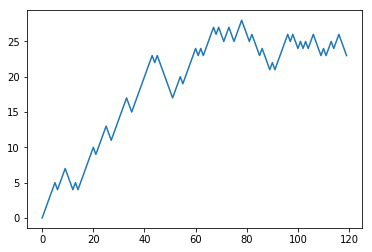

In [2]:
#generate data
trueA = 5.0
trueB = 0.2
nt = 120         #number of reactions to simulate
y=np.zeros(nt+1)     #complete data
t=np.zeros(nt+1)     #time
y[0]=0             
t[0]=0
v=np.array([1, -1])            #reaction vectors
#Perform SSA
for i in range(nt):
    a=np.array([trueA, trueB*y[i]] )
    sum_a=np.sum(a)
    cumsum_a=np.cumsum(a,axis=0)
    epsilon=np.random.uniform(0,1,2)
    dummy=len(cumsum_a)-1
    for k in range(2):
        if cumsum_a[k]>epsilon[0]*sum_a and k<=dummy:
            dummy=k 
    j=dummy               
    tau=(np.log(1/epsilon[1]))/sum_a
    y[i+1]=y[i]+v[j]
    t[i+1]=t[i]+tau

plt.plot(y[:nt])
plt.show()

In [3]:
Ashape=25
Arate=5
Bshape=2
Brate=10

In [4]:
basic_model = pm.Model()
with basic_model: 
    #priors
    A = pm.Gamma('A',alpha=Ashape,beta=Arate)
    B = pm.Gamma('B',alpha=Bshape,beta=Brate)
    #custom likelihood
    
    def A_like(A,B,y,nt,t): #loglikelihood
        w=0
        for i in range(nt-1):
            if (y[i+1]-y[i])>0:
                k2=np.log(A)
            else:
                k2=np.log(B*y[i])
            k1=-(A+B*y[i])*(t[i+1]-t[i])    
            w+=k2+k1 
        return w
    
    like = pm.Potential('like',A_like(A,B,y,nt,t))
    
    #instantiate sample
    step = pm.NUTS()
    trace = pm.sample(5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [B, A]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:15<00:00, 1443.51draws/s]


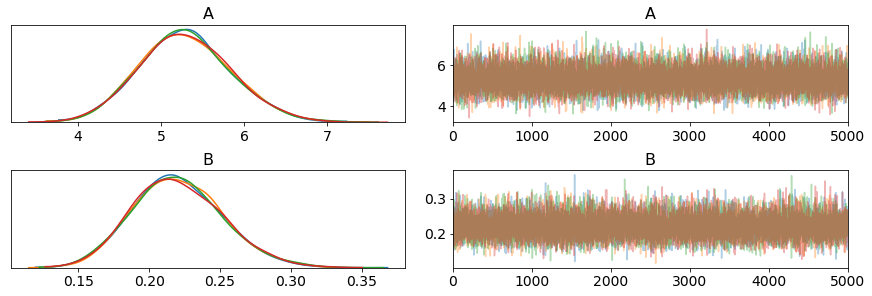

In [5]:
pm.traceplot(trace);

In [6]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
A,5.297869,0.543984,0.003606,4.254118,6.377745,20440.520803,0.999904
B,0.220432,0.031322,0.000203,0.160135,0.282170,21563.893655,0.999922
